In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pylab import mpl
# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['STZhongsong']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
stock_data = pd.read_csv("../Data/stock_2.csv")
stock_data

,Stock Name,Stock Code,Date,Open,Close,High,Low,Volume,Turnover,Amplitude,Change Percent,Change Amount,Turnover Rate
0,苹果,AAPL,1984-09-07,-7.43,-7.43,-7.42,-7.43,2981600,0.000000e+00,0.00,0.00,0.00,0.02
1,苹果,AAPL,1984-09-10,-7.43,-7.43,-7.42,-7.43,2346400,0.000000e+00,-0.13,0.00,0.00,0.02
2,苹果,AAPL,1984-09-11,-7.42,-7.42,-7.42,-7.42,5444000,0.000000e+00,0.00,0.13,0.01,0.03
3,苹果,AAPL,1984-09-12,-7.42,-7.43,-7.42,-7.43,4773600,0.000000e+00,-0.13,-0.13,-0.01,0.03
4,苹果,AAPL,1984-09-13,-7.42,-7.42,-7.42,-7.42,7429600,0.000000e+00,0.00,0.13,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9286,苹果,AAPL,2023-09-25,174.20,176.08,176.97,174.15,46172740,8.111390e+09,1.61,0.74,1.29,0.30
9287,苹果,AAPL,2023-09-26,174.82,171.96,175.20,171.66,64588945,1.115645e+10,2.01,-2.34,-4.12,0.41
9288,苹果,AAPL,2023-09-27,172.62,170.43,173.04,169.05,66921808,1.141146e+10,2.32,-0.89,-1.53,0.43
9289,苹果,AAPL,2023-09-28,169.34,170.69,172.03,167.62,56294419,9.587716e+09,2.59,0.15,0.26,0.36


### 收盘价
- 收盘价是股票在正常交易日的最后一个交易价格。股票的收盘价是投资者追踪其长期表现的标准基准。

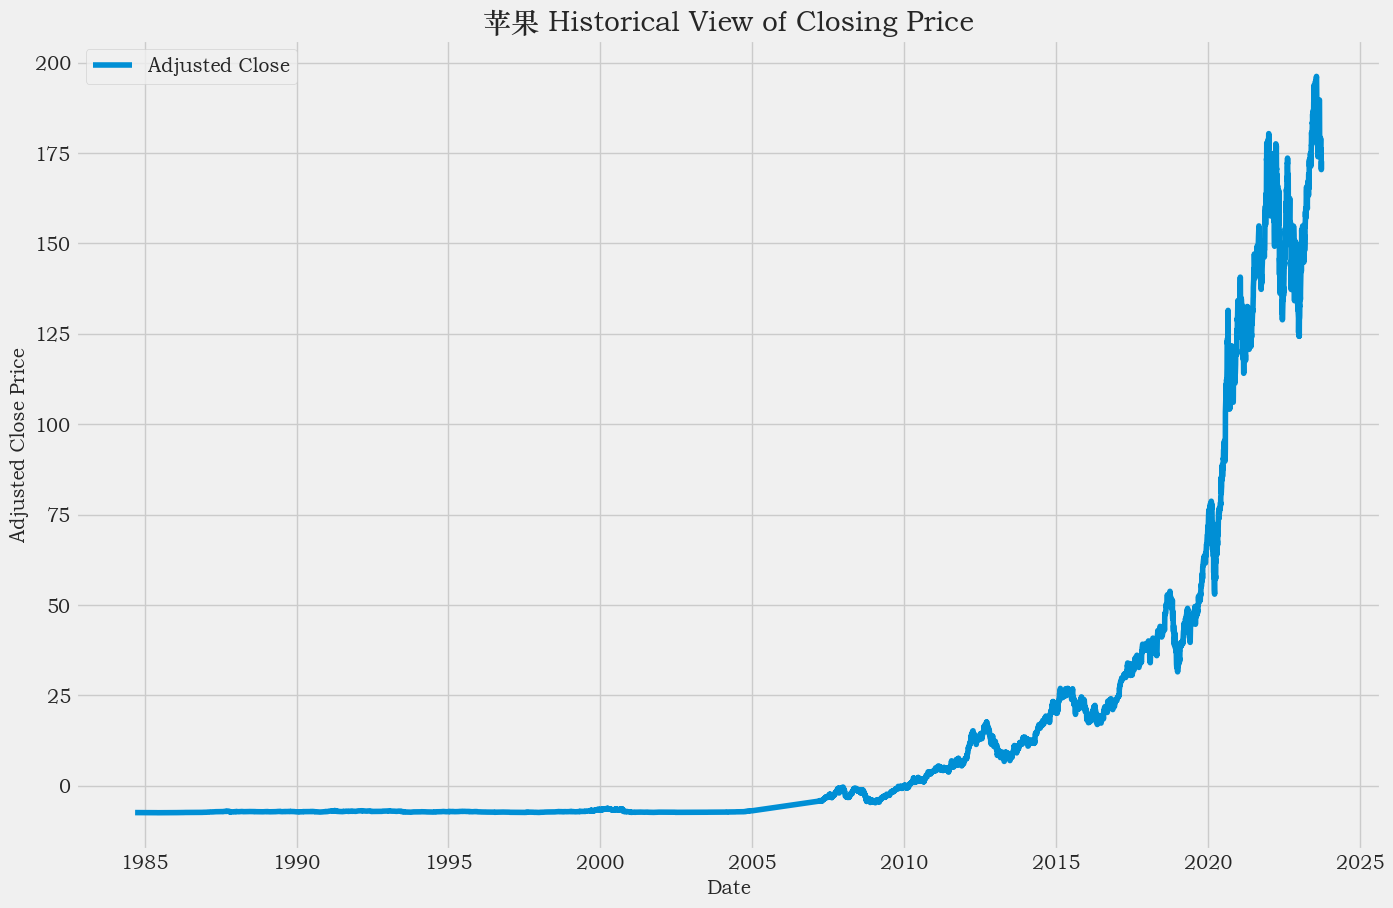

In [4]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)

stock_name = stock_data['Stock Name'].iloc[0]

plt.figure(figsize=(15, 10))
plt.plot(stock_data['Close'], label='Adjusted Close')
plt.title(f'{stock_name} Historical View of Closing Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

### 销售量
- 交易量是指一项资产或证券在一段时间内(通常是一天内)易手的数量。例如，股票交易量是指每日开盘和收盘之间交易的股票数量。交易量，以及随着时间的推移交易量的变化，是技术交易者的重要投入

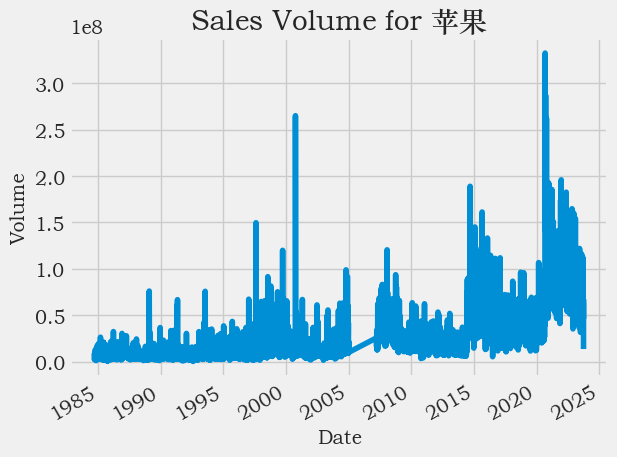

In [5]:
ax = plt.subplot(1, 1, 1)
stock_data['Volume'].plot(ax=ax)
ax.set_ylabel('Volume')
ax.set_xlabel('Date')
ax.set_title(f"Sales Volume for {stock_name}")

plt.tight_layout()
plt.show()

### 股票的移动平均数
- 移动平均线(Moving Average, MA)是技术分析中最常用的技术指标之一。它通过计算价格的移动平均值来平滑价格数据。移动平均线可以用于识别价格的短期和长期趋势，以及预测价格的移动方向。
- 移动平均线通常使用不同的时间窗口(period)来计算，例如5天、10天、20天等。
- 移动平均线可以用于识别价格的短期和长期趋势，以及预测价格的移动方向。


<Figure size 1500x1000 with 0 Axes>

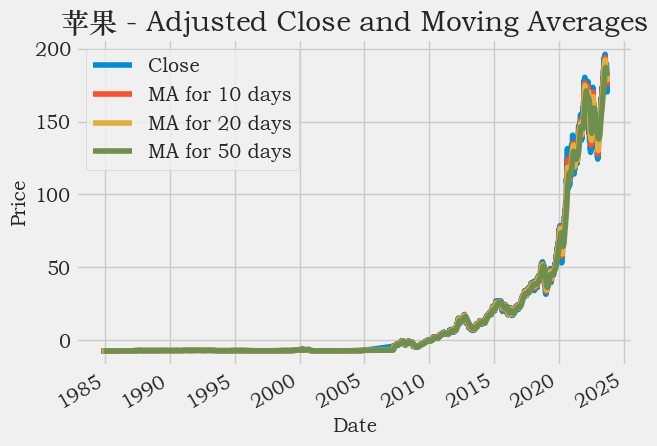

In [6]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    stock_data[column_name] = stock_data['Close'].rolling(window=ma).mean()

# Plot the adjusted close prices and moving averages
plt.figure(figsize=(15, 10))
stock_data[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title(f"{stock_data['Stock Name'].iloc[0]} - Adjusted Close and Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### 股票的日平均回报率
- 平均每日回报率(Daily Return Rate, DRR)是衡量股票收益率的一种指标。它计算了股票每天的平均收益率。DRR可以用于衡量股票的长期投资回报率。
- 平均每日回报率的计算方法是，将股票每天的价格除以前一天的价格，然后取这些比率的平均值。
- 平均每日回报率的范围通常在-1到+1之间，其中-1表示股票下跌，+1表示股票上涨。
- 平均每日回报率可以用于衡量股票的长期投资回报率。

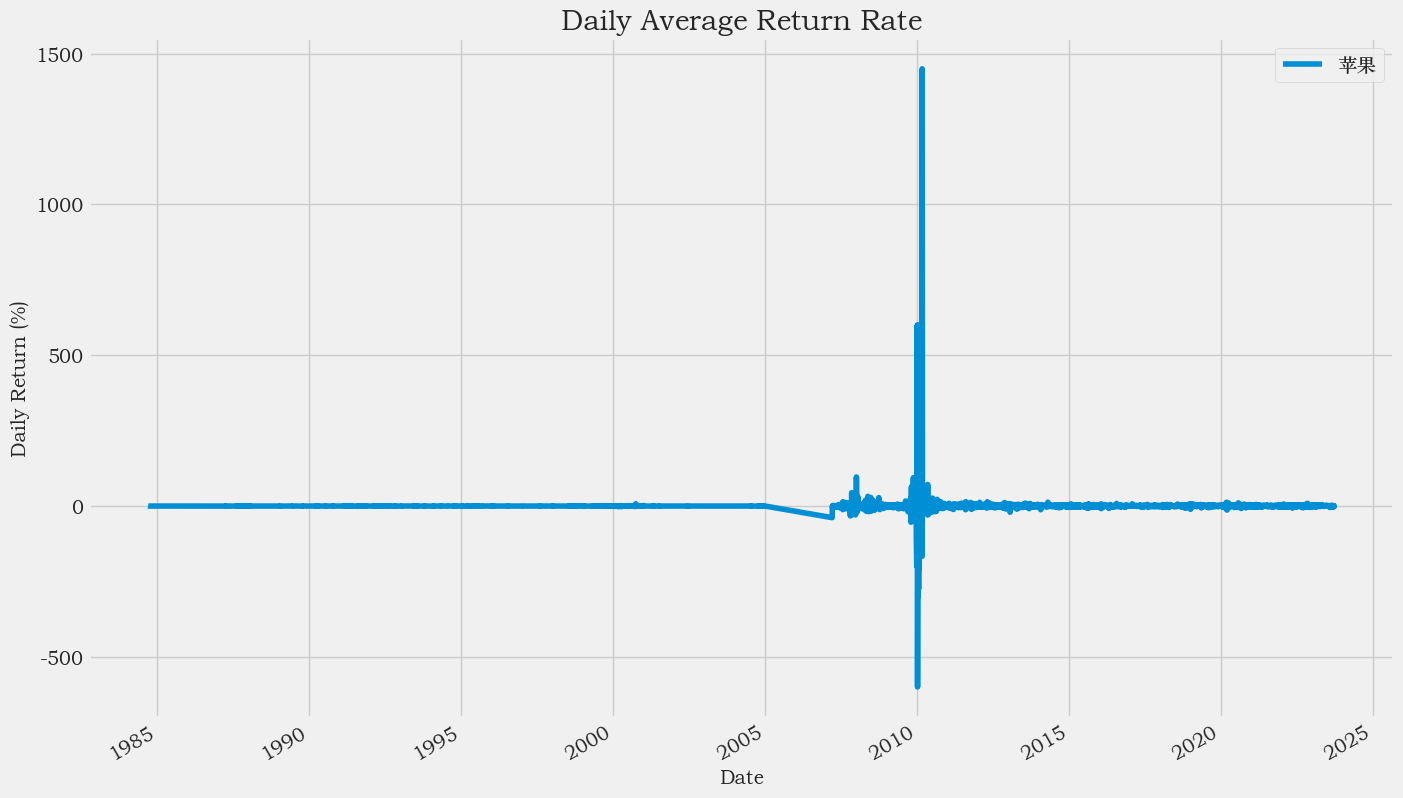

In [7]:
stock_data['Daily Return'] = stock_data['Close'].pct_change() * 100

plt.figure(figsize=(15, 10))

for stock_name, company_data in stock_data.groupby('Stock Name'):
    company_data['Daily Return'].plot(label=stock_name)

plt.title('Daily Average Return Rate')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.legend()
plt.show()


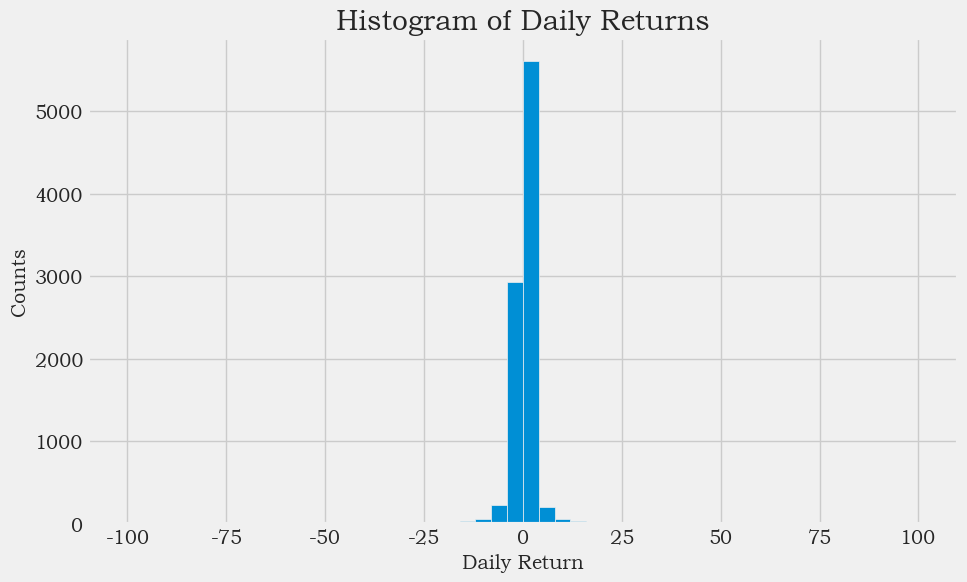

In [11]:
stock_data['Daily Return'] = stock_data['Close'].pct_change() * 100

# Plot a histogram of the daily return rate
plt.figure(figsize=(10, 6))
stock_data['Daily Return'].hist(bins=50, range=[-100, 100])
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

